# Polynomial Regression Assignment (Please do not remove the output cells)

## The objective is to apply polynomial regression on the provided data using 3 regularization techniques

Tasks are defined below:
1-  Read the dataset, and get acquainted with its features and labels. Check the link below for more details about the data.  
https://archive.ics.uci.edu/ml/datasets/Air+Quality  

2-  This dataset has 5 different output labels. For this assignment we only need the NO2 output. Please drop other outputs.  

3-  Handle missing data similar to what was covered in tutorial 3.  

4-  Replace the date feature with 3 separate features (Day, Month and Year).  

5-  Replace the time feature with 3 separate features (Hours, Minutes and Seconds).  

6-  Apply feature scaling.  

7-  Evaluate different degrees of lasso CV polynomial regression.  

8-  Choose the best degree and print the errors on the test data, model coefficients and the lasso parameters.  

9-  Repeat steps 4 and 5 using Ridge CV polynomial regression.  

10- Repeat steps 4 and 5 using ElasticNet CV polynomial regression.  

11- Compare the errors from the 3 regularization techniques, and save the best model.  

12- Load the best model and test it on a sample that you manually created it.  


## Enter your IDs and Names below

1-  Salma El-Shafey 46-17002
  
2- Reem Abdelrazek 46-13896


### Imports

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
#import sklearn as sk 

### 1- Read the data

In [42]:
df = pd.read_csv('AirQualityUCI.csv')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


### 2- Drop unwanted labels

In [43]:
df.drop(df.columns[[2,4,5,7]], axis =1,inplace = True)
df

,Date,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,1314.0,1101.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,1163.0,1027.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,1142.0,1063.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,1003.0,961.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


### 3- Handle missing data

In [44]:
df.isnull().sum()

Date                0
Time                0
PT08.S1(CO)       366
PT08.S2(NMHC)     366
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [45]:
# numbers of null values in 8 columns is 366
# what if they're all in the same rows?
# just to check, drop rows with more than 7 values missing

df_dropped_rows = df[df.isnull().sum(axis=1) < 8]
df_dropped_rows

,Date,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,1314.0,1101.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,1163.0,1027.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,1142.0,1063.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,1003.0,961.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [46]:
df_dropped_rows.isnull().sum()

Date                0
Time                0
PT08.S1(CO)         0
PT08.S2(NMHC)       0
PT08.S3(NOx)        0
NO2(GT)          1598
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
dtype: int64

In [47]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [8]:
#Imputation will be done after splitting the date and time columns

### 4- Replace date feature

In [48]:
df_dropped_rows[["Day", "Month", "Year"]] = df_dropped_rows["Date"].str.split("/", expand = True)
df_dropped_rows.drop('Date',axis = 1,inplace = True)
df_dropped_rows

/var/folders/n9/r3zlbmnd6csc4y4lg65njb6r0000gn/T/ipykernel_32496/3761602337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped_rows[["Day", "Month", "Year"]] = df_dropped_rows["Date"].str.split("/", expand = True)
/var/folders/n9/r3zlbmnd6csc4y4lg65njb6r0000gn/T/ipykernel_32496/3761602337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped_rows[["Day", "Month", "Year"]] = df_dropped_rows["Date"].str.split("/", expand = True)
/var/folders/n9/r3zlbmnd6csc4y4lg65njb6r0000gn/T/ipykernel_3

,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Day,Month,Year
0,18:00:00,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3,10,2004
1,19:00:00,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3,10,2004
2,20:00:00,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,3,10,2004
3,21:00:00,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3,10,2004
4,22:00:00,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3,10,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,10:00:00,1314.0,1101.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,4,4,2005
9353,11:00:00,1163.0,1027.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,4,4,2005
9354,12:00:00,1142.0,1063.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,4,4,2005
9355,13:00:00,1003.0,961.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,4,4,2005


### 5- Replace time feature

In [49]:
df_dropped_rows[["Hours", "Minutes", "Seconds"]] = df_dropped_rows["Time"].str.split(":", expand = True)
df_dropped_rows.drop('Time',axis = 1,inplace = True)
df_dropped_rows

/var/folders/n9/r3zlbmnd6csc4y4lg65njb6r0000gn/T/ipykernel_32496/854840442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped_rows[["Hours", "Minutes", "Seconds"]] = df_dropped_rows["Time"].str.split(":", expand = True)
/var/folders/n9/r3zlbmnd6csc4y4lg65njb6r0000gn/T/ipykernel_32496/854840442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped_rows[["Hours", "Minutes", "Seconds"]] = df_dropped_rows["Time"].str.split(":", expand = True)
/var/folders/n9/r3zlbmnd6csc4y4lg65njb6r0000gn/T

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Day,Month,Year,Hours,Minutes,Seconds
0,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3,10,2004,18,00,00
1,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3,10,2004,19,00,00
2,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,3,10,2004,20,00,00
3,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3,10,2004,21,00,00
4,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3,10,2004,22,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,1314.0,1101.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,4,4,2005,10,00,00
9353,1163.0,1027.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,4,4,2005,11,00,00
9354,1142.0,1063.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,4,4,2005,12,00,00
9355,1003.0,961.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,4,4,2005,13,00,00


In [50]:
#Imputation will be done here

imp = IterativeImputer(max_iter=10, random_state=0)
imputed_df = imp.fit_transform(df_dropped_rows)
imputed_df = pd.DataFrame(imputed_df, columns=df_dropped_rows.columns)
imputed_df

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Day,Month,Year,Hours,Minutes,Seconds
0,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3.0,10.0,2004.0,18.0,0.0,0.0
1,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3.0,10.0,2004.0,19.0,0.0,0.0
2,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,3.0,10.0,2004.0,20.0,0.0,0.0
3,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3.0,10.0,2004.0,21.0,0.0,0.0
4,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3.0,10.0,2004.0,22.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8986,1314.0,1101.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,4.0,4.0,2005.0,10.0,0.0,0.0
8987,1163.0,1027.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,4.0,4.0,2005.0,11.0,0.0,0.0
8988,1142.0,1063.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,4.0,4.0,2005.0,12.0,0.0,0.0
8989,1003.0,961.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,4.0,4.0,2005.0,13.0,0.0,0.0


In [51]:
imputed_df.isnull().sum()

PT08.S1(CO)      0
PT08.S2(NMHC)    0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Day              0
Month            0
Year             0
Hours            0
Minutes          0
Seconds          0
dtype: int64

### 6- Apply feature scaling

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [53]:
X = imputed_df.drop('NO2(GT)',axis = 1)
y = imputed_df['NO2(GT)']

In [54]:
X

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Day,Month,Year,Hours,Minutes,Seconds
0,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,3.0,10.0,2004.0,18.0,0.0,0.0
1,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,3.0,10.0,2004.0,19.0,0.0,0.0
2,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,3.0,10.0,2004.0,20.0,0.0,0.0
3,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,3.0,10.0,2004.0,21.0,0.0,0.0
4,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,3.0,10.0,2004.0,22.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8986,1314.0,1101.0,539.0,1374.0,1729.0,21.9,29.3,0.7568,4.0,4.0,2005.0,10.0,0.0,0.0
8987,1163.0,1027.0,604.0,1264.0,1269.0,24.3,23.7,0.7119,4.0,4.0,2005.0,11.0,0.0,0.0
8988,1142.0,1063.0,603.0,1241.0,1092.0,26.9,18.3,0.6406,4.0,4.0,2005.0,12.0,0.0,0.0
8989,1003.0,961.0,702.0,1041.0,770.0,28.3,13.5,0.5139,4.0,4.0,2005.0,13.0,0.0,0.0


In [55]:
y

0       113.0
1        92.0
2       114.0
3       122.0
4       116.0
        ...  
8986    190.0
8987    179.0
8988    175.0
8989    156.0
8990    168.0
Name: NO2(GT), Length: 8991, dtype: float64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [57]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

### 7- Evaluate different degrees of lasso CV polynomial regression

In [24]:
train_rmse_errors = []
test_rmse_errors = []
for d in range(1, 6):
    print("currently in iteration: ", d)
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features_train = polynomial_converter.fit_transform(scaled_X_train)
    poly_features_test = polynomial_converter.fit_transform(scaled_X_test)
    model =  LassoCV(eps=0.1,n_alphas=100,cv=5)
    model.fit(poly_features_train,y_train)
    train_pred = model.predict(poly_features_train)
    test_pred = model.predict(poly_features_test)
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))  
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

currently in iteration:  1
currently in iteration:  2
currently in iteration:  3
currently in iteration:  4
currently in iteration:  5


### 8- Choose the best degree and print the errors, model coefficients and the lasso parameters.

In [25]:
import matplotlib.pyplot as plt

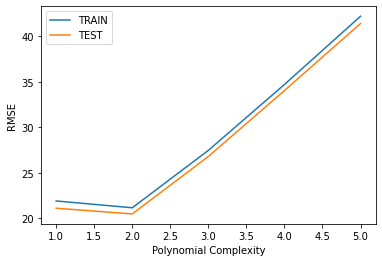

In [27]:
plt.plot(range(1,6),train_rmse_errors,label='TRAIN')
plt.plot(range(1,6),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [22]:
#after the plot, observe the best degree , choose the degree and train a new model accordingly 

In [28]:
polynomial_converter_lasso = PolynomialFeatures(degree=2,include_bias=False)
poly_features_train = polynomial_converter.fit_transform(scaled_X_train)
poly_features_test = polynomial_converter.fit_transform(scaled_X_test)
lasso_cv_model =  LassoCV(eps=0.1,n_alphas=100,cv=5)
lasso_cv_model.fit(poly_features_train,y_train)
#train_pred = lasso_cv_model.predict(X_train)
test_pred = lasso_cv_model.predict(poly_features_test)
#train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
MAE = mean_absolute_error(y_test,test_pred)
MSE = mean_squared_error(y_test,test_pred)
RMSE_lasso = np.sqrt(mean_squared_error(y_test,test_pred))  

In [29]:
MAE

14.88330586144493

In [30]:
MSE

420.3593307154854

In [31]:
RMSE_lasso

20.502666429405846

In [32]:
imputed_df['NO2(GT)'].mean()

107.87544081225829

In [33]:
lasso_cv_model.alpha_

3.4212243161164815

In [34]:
lasso_cv_model.coef_

array([  0.        ,  12.84042338,  -6.86276759,  -0.        ,
        13.77933184,  -0.        ,  -0.        , -12.9556961 ,
         0.        ,   0.        ,   0.        ,   4.22316175,
         0.        ,   0.        ,  -0.        ,  -0.        ,
         0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,   0.        ,
         0.        ,  -0.        ,   0.        ,   0.        ,
        -0.        ,   0.        ,  -0.        ,  -0.        ,
         0.        ,  -0.        ,  -0.        ,  -0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
         0.        ,  -0.        ,   0.76348194,   0.        ,
         0.        ,   0.        ,   0.12438233,   0.        ,
        -0.        ,  -0.06085445,   0.        ,   0.        ,
         0.        ,  -0.        ,  -0.        ,   0.        ,
        -0.        ,   0.        ,  -0.        ,   0.        ,
        -0.        ,  -0.        ,   0.        ,   0.  

### 9a- Evaluate different degrees of Ridge CV polynomial regression

In [35]:
train_rmse_errors = []
test_rmse_errors = []
for d in range(1,6):
    print("currently in iteration: ", d)
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features_train = polynomial_converter.fit_transform(scaled_X_train)
    poly_features_test = polynomial_converter.fit_transform(scaled_X_test)
    model =  RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')    
    model.fit(poly_features_train,y_train)
    train_pred = model.predict(poly_features_train)
    test_pred = model.predict(poly_features_test)
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

currently in iteration:  1
currently in iteration:  2
currently in iteration:  3
currently in iteration:  4
currently in iteration:  5


### 9b- Choose the best degree and print the errors, model coefficients and the Ridge parameters.

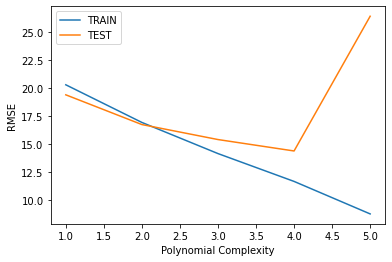

In [36]:
plt.plot(range(1,6),train_rmse_errors,label='TRAIN')
plt.plot(range(1,6),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [32]:
#after the plot, observe the best degree , choose the degree and train a new model accordingly 

In [33]:
polynomial_converter_ridge = PolynomialFeatures(degree=2,include_bias=False)
poly_features_train = polynomial_converter.fit_transform(scaled_X_train)
poly_features_test = polynomial_converter.fit_transform(scaled_X_test)
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error') 
ridge_cv_model.fit(scaled_X_train,y_train)
#train_pred = ridge_cv_model.predict(X_train)
test_pred = ridge_cv_model.predict(scaled_X_test)
#train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
MAE = mean_absolute_error(y_test,test_pred)
MSE = mean_squared_error(y_test,test_pred)
RMSE_ridge = np.sqrt(MSE)

In [34]:
MAE

13.309288639785585

In [35]:
MSE

377.5771223031417

In [36]:
RMSE_ridge

19.4313438110477

In [37]:
ridge_cv_model.alpha_

0.1

In [38]:
ridge_cv_model.coef_

array([ -0.85928238,  28.58179009,  -6.46179935, -18.7492228 ,
        15.01342692,   6.83824093,   1.27839856, -11.95057662,
        -2.74433938,   0.30964067,   6.67982473,   5.15269654,
         0.        ,   0.        ])

### 10a- Evaluate different degrees of ElasticNet CV polynomial regression

In [ ]:
train_rmse_errors = []
test_rmse_errors = []
for d in range(1,10):
    # CREATE POLY DATA SET FOR DEGREE "d"
    print("currently in iteration: ", d)
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features_train = polynomial_converter.fit_transform(scaled_X_train)
    poly_features_test = polynomial_converter.fit_transform(scaled_X_test)
    model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=1e-4)
    model.fit(scaled_X_train,y_train)
    train_pred = model.predict(scaled_X_train)
    test_pred = model.predict(scaled_X_test)
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

currently in iteration:  1
currently in iteration:  2
currently in iteration:  3
currently in iteration:  4
currently in iteration:  5
currently in iteration:  6
currently in iteration:  7
currently in iteration:  8
currently in iteration:  9


### 10b- Choose the best degree and print the errors, model coefficients and ElasticNet parameters.

In [1]:
plt.plot(range(1,8),train_rmse_errors,label='TRAIN')
plt.plot(range(1,8),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

NameError: name 'plt' is not defined

In [41]:
#after the plot, observe the best degree , choose the degree and train a new model accordingly 

In [ ]:
#d = ?
polynomial_converter_elastic = PolynomialFeatures(degree=d,include_bias=False)
poly_features_train = polynomial_converter.fit_transform(scaled_X_train)
poly_features_test = polynomial_converter.fit_transform(scaled_X_test)
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)
elastic_model.fit(scaled_X_train,y_train)
#train_pred = elastic_model.predict(X_train)
test_pred = elastic_model.predict(scaled_X_test)
#train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
MAE = mean_absolute_error(y_test,test_pred)
MSE = mean_squared_error(y_test,test_pred)
RMSE_elastic = np.sqrt(MSE)

In [ ]:
MAE

In [ ]:
MSE

In [ ]:
RMSE_elastic

In [ ]:
elastic_model.l1_ratio_

In [ ]:
elastic_model.coef_

### 11- Compare the errors from the 3 regularization techniques, and save the best model.

In [ ]:
least_error = min(min(RMSE_lasso,RMSE_ridge),RMSE_elastic)

In [ ]:
if (least_error == RMSE_lasso)
    final_model = lasso_cv_model
    final_poly_converter = polynomial_converter_lasso
else if (least_error == RMSE_rigde)
    final_model = ridge_cv_model
    final_poly_converter = polynomial_converter_ridge
else 
    final_model = elastic_model
    final_poly_converter = polynomial_converter_elastic

In [ ]:
from joblib import dump, load

In [ ]:
dump(final_model, 'sales_poly_model.joblib') 

In [ ]:
dump(final_poly_converter,'poly_converter.joblib')

### 12- Load the best model and test it on a sample that you manually created it.

In [ ]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

## Great work!
----